<a href="https://colab.research.google.com/github/Kashyap23Rajat/Life_Expectency_Linear_Regression/blob/main/Gestational_Diabetes_logistic_regression_%26_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_excel('/content/diabetes_Logistic_Regression.xlsx')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [ ]:
fig1 = px.histogram(df, x = 'Pregnancies', marginal = 'box',
                    title = 'Pregnancies Week',
                    labels = {'x': 'In Week', 'y': 'Number of Women'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

Here, we see that from 0 to 4 weeks of Pregnancies. Maximum number of women is pregnant(Total Count = 424).

In [ ]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [ ]:
df['Glucose'].min()

0

Giving range to the glucose level
*   No Diabetic (0 to 100 mg/dL) = 1
*   Prediabetic (101 to 125 mg/dL) = 2
*   Diabetes or High diabetes (126 to 199 mg/dL) = 3



In [ ]:
def glu(x):
  if x in range(0,100):
    return 1
  elif x in range(100,125):
    return 2
  elif x in range(125,200):
    return 3

df['Glucose']=df['Glucose'].apply(glu)

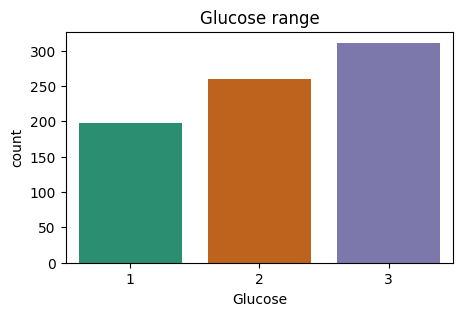

In [ ]:
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = 'Glucose', palette = 'Dark2')
plt.xlabel('Glucose')
plt.title('Glucose range');

In [ ]:
df['Glucose'].value_counts()

3    311
2    260
1    197
Name: Glucose, dtype: int64

With this graph we see that the range 3, which is glucose level of 125mg/dL and above are highest in number.

In [ ]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [ ]:
df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

In [ ]:
fig1 = px.histogram(df, x = 'BloodPressure', marginal = 'box',
                    title = 'Blood pressure measurement',
                    labels = {'x': 'In (mmHg)', 'y': 'Blood Pressure'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

Maximum number of people comes between 50 mmHg to 94 mmHg of Blood Pressure.

Segregate Blood Pressure column into range
*   Low BP(below than 90/80 mmHg) = 1
*   Ideal BP(90/80 to 120/80 mmHg) = 2
*   High BP(120/80 mmHg and above) = 3



In [ ]:
def bp(x):
  if x in range(0,90):
    return 1
  elif x in range(90,120):
    return 2
  elif x in range(120,130):
    return 3
df['BloodPressure']=df['BloodPressure'].apply(bp)

In [ ]:
df['BloodPressure'].unique()

array([1, 2, 3])

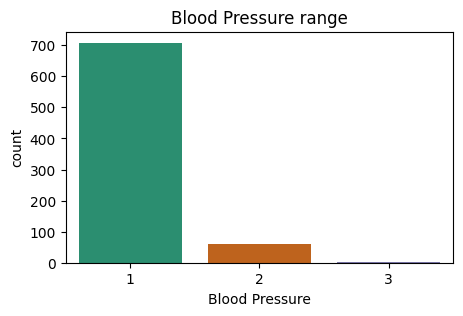

In [ ]:
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = 'BloodPressure', palette = 'Dark2')
plt.xlabel('Blood Pressure')
plt.title('Blood Pressure range');

In [ ]:
df['BloodPressure'].value_counts()

1    708
2     59
3      1
Name: BloodPressure, dtype: int64

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

**Skin Thickness** = The average thickness of human skin is 2 mm, but it can range from 0.3–2.6 mm depending on the body part.
 For example, skin on the eyelids is 0.5 mm thick, while the heels of the feet are 4 mm thick.
 The epidermis is thinnest on the eyelids (0.05 mm) and thickest on the palms and soles (1.5 mm).

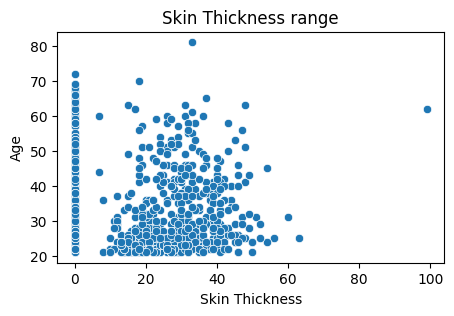

In [ ]:
plt.figure(figsize = (5,3))
sns.scatterplot(data = df, x = 'SkinThickness', y = 'Age')
plt.xlabel('Skin Thickness')
plt.title('Skin Thickness range');

In [ ]:
fig1 = px.histogram(df, x = 'SkinThickness', marginal = 'box',
                    title = 'People Skin Thickness',
                    labels = {'x': 'Skin Thickness', 'y': 'count'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

This Graph says that the maximum number of people having the less Skin Thickness, but the maximum number of people is has skin thickness in the range of 10 to 44.



In [ ]:
fig1 = px.histogram(df, x = 'Insulin', marginal = 'box',
                    title = 'Individuals Insulin Count',
                    labels = {'x': 'Insulin', 'y': 'count'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

In [ ]:
# BMI

fig1 = px.histogram(df, x = 'BMI', marginal = 'box',
                    title = 'Body Mass Index (BMI)',
                    labels = {'x': 'BMI', 'y': 'count'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

This Graph gives insight, that the maximum number of people comes under the BMI range of 21 to 39.

**Diabetes Pedigree Function(DPF)** = It is a function that calculates the likelihood of diabetes based on a person's age and family history of diabetes. The realistic range for DPF is 0.08 to 2.42, and the realistic range for age is 21 to 81. In the target variable, 0 represents healthy people, and 1 represents those with diabetes.

In [ ]:
# DiabetesPedigreeFunction

fig1 = px.histogram(df, x = 'DiabetesPedigreeFunction', marginal = 'box',
                    title = 'Diabetes Pedigree Function of an Individuals',
                    labels = {'x': 'DPF', 'y': 'count'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

In [ ]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [ ]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [ ]:
fig8 = px.histogram(df, x = 'Age', marginal = 'box',
                    title = 'Distribution of Age',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig8.show()

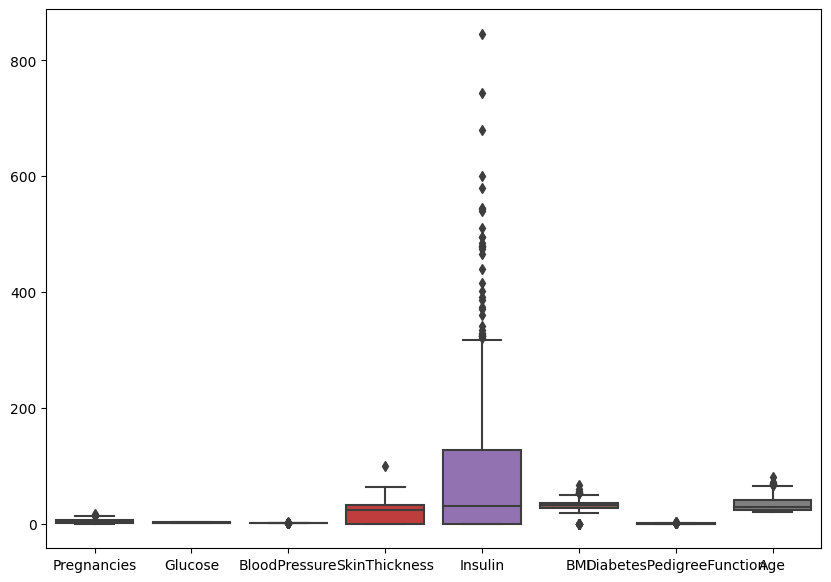

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df[['Pregnancies','Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.show()

In [ ]:
num_var = df.select_dtypes(exclude='object')
for i in num_var:

    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3 - q1
    UL = q3 + 1.5*IQR
    LL = q1 - 1.5*IQR

    print('IQR of',i,'= ',IQR)
    print('UL of',i,'= ',UL)
    print('LL of',i,'= ',LL)
    print('Number of Outliers in',i,' = ',(df.shape[0] - df[(df[i]<UL) & (df[i]>LL)].shape[0]))
    print(' ')

IQR of Pregnancies =  5.0
UL of Pregnancies =  13.5
LL of Pregnancies =  -6.5
Number of Outliers in Pregnancies  =  4
 
IQR of Glucose =  2.0
UL of Glucose =  6.0
LL of Glucose =  -2.0
Number of Outliers in Glucose  =  0
 
IQR of BloodPressure =  0.0
UL of BloodPressure =  1.0
LL of BloodPressure =  1.0
Number of Outliers in BloodPressure  =  768
 
IQR of SkinThickness =  32.0
UL of SkinThickness =  80.0
LL of SkinThickness =  -48.0
Number of Outliers in SkinThickness  =  1
 
IQR of Insulin =  127.25
UL of Insulin =  318.125
LL of Insulin =  -190.875
Number of Outliers in Insulin  =  34
 
IQR of BMI =  9.3
UL of BMI =  50.550000000000004
LL of BMI =  13.35
Number of Outliers in BMI  =  19
 
IQR of DiabetesPedigreeFunction =  0.38249999999999995
UL of DiabetesPedigreeFunction =  1.2
LL of DiabetesPedigreeFunction =  -0.32999999999999996
Number of Outliers in DiabetesPedigreeFunction  =  29
 
IQR of Age =  17.0
UL of Age =  66.5
LL of Age =  -1.5
Number of Outliers in Age  =  9
 
IQR of 

In [ ]:
di0 = df[df['Outcome']==0]
di1 = df[df['Outcome']==1]

In [ ]:
di0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,1,1,29,0,26.6,0.351,31,0
3,1,1,1,23,94,28.1,0.167,21,0
5,5,2,1,0,0,25.6,0.201,30,0
7,10,2,1,0,0,35.3,0.134,29,0
10,4,2,2,0,0,37.6,0.191,30,0


In [ ]:
di1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3,1,35,0,33.6,0.627,50,1
2,8,3,1,0,0,23.3,0.672,32,1
4,0,3,1,35,168,43.1,2.288,33,1
6,3,1,1,32,88,31.0,0.248,26,1
8,2,3,1,45,543,30.5,0.158,53,1


In [ ]:
dia_col=['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

<ipython-input-255-601377e1c1ed>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-255-601377e1c1ed>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




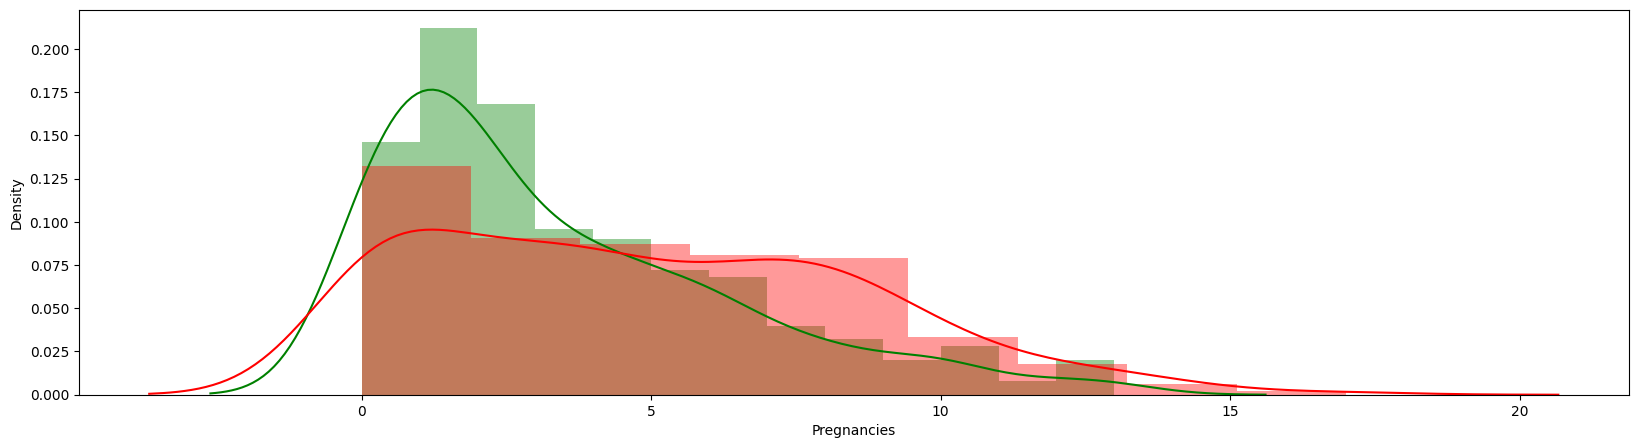

<ipython-input-255-601377e1c1ed>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-255-601377e1c1ed>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




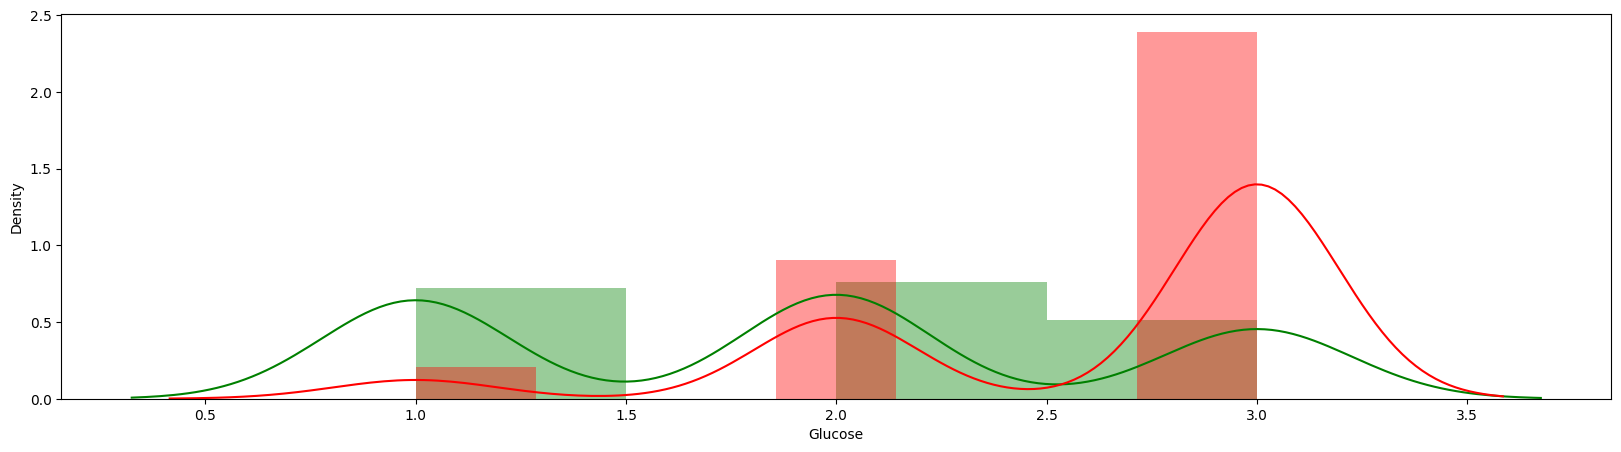

<ipython-input-255-601377e1c1ed>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-255-601377e1c1ed>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




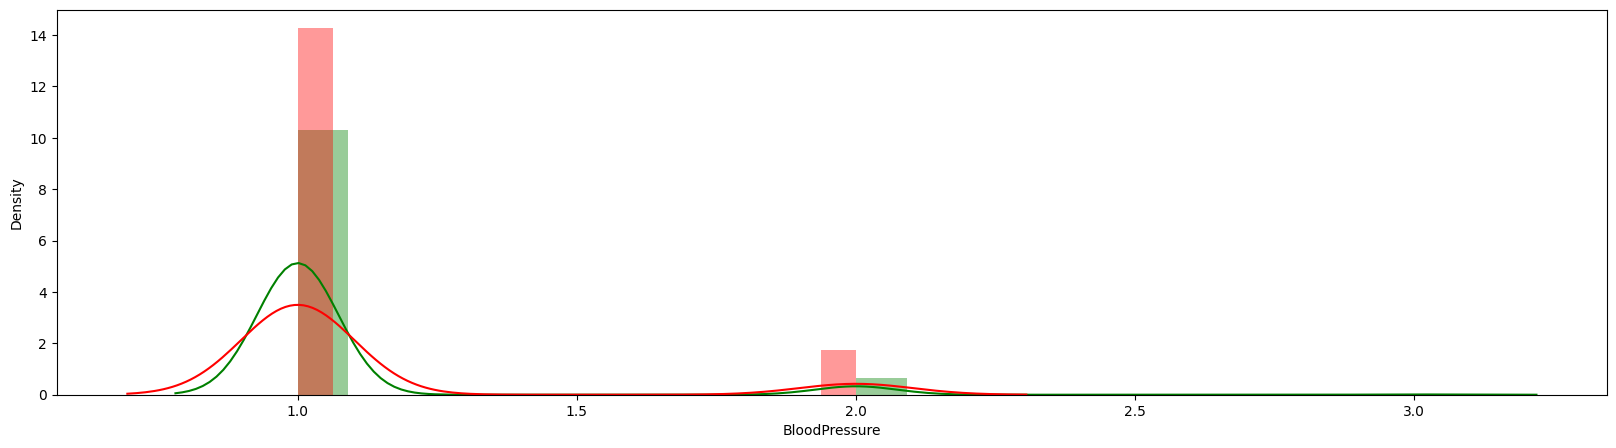

<ipython-input-255-601377e1c1ed>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-255-601377e1c1ed>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




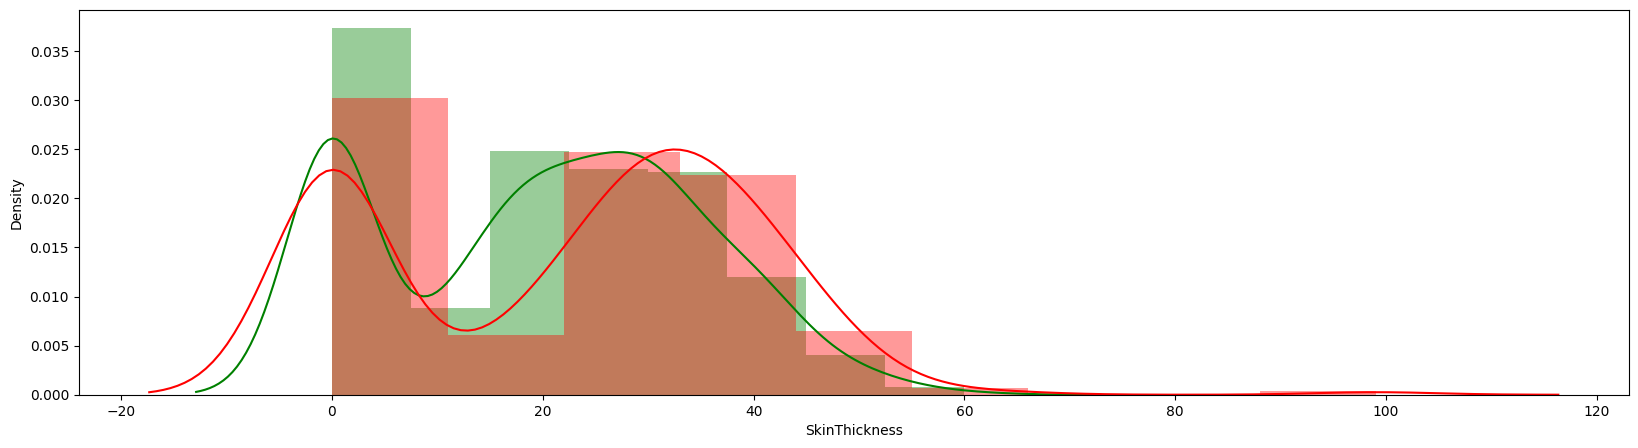

<ipython-input-255-601377e1c1ed>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-255-601377e1c1ed>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




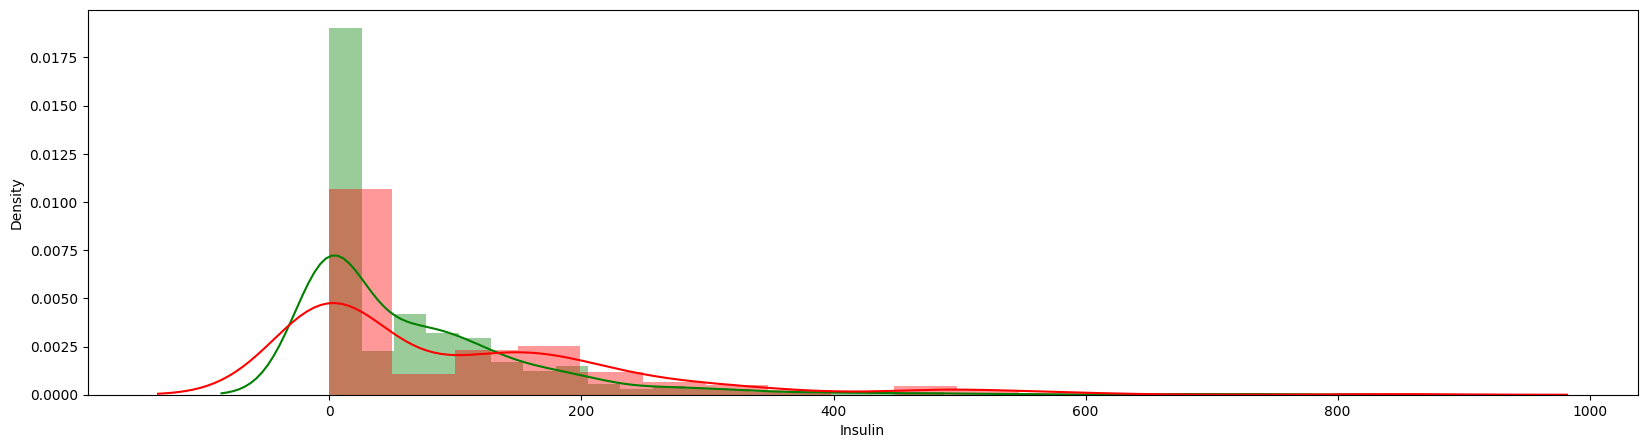

<ipython-input-255-601377e1c1ed>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-255-601377e1c1ed>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




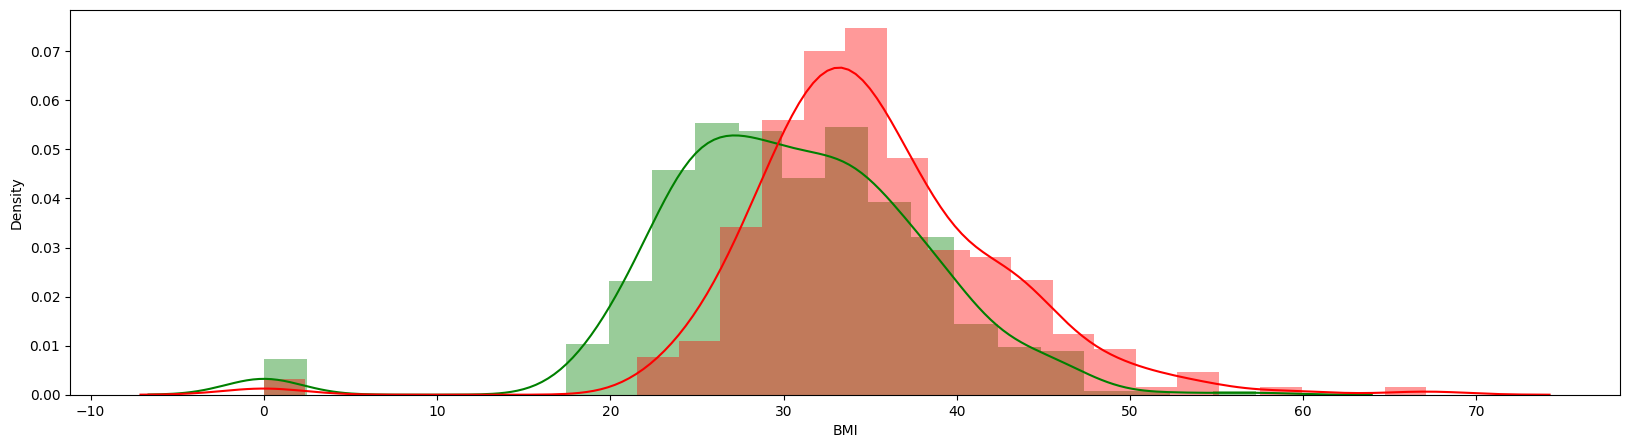

<ipython-input-255-601377e1c1ed>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-255-601377e1c1ed>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




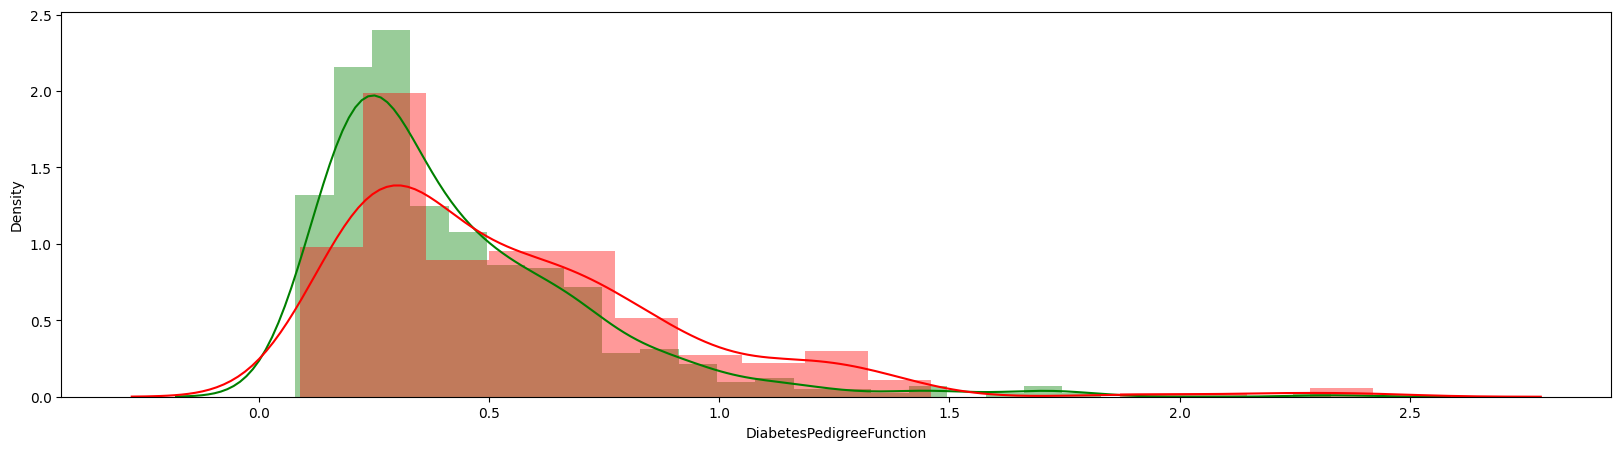

<ipython-input-255-601377e1c1ed>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-255-601377e1c1ed>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




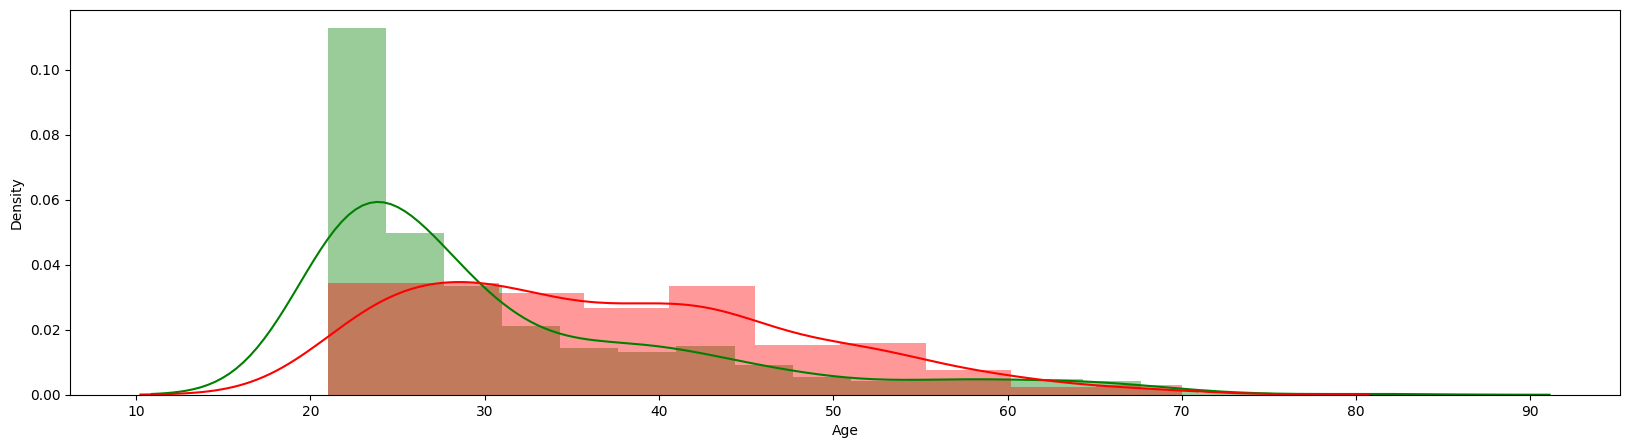

In [ ]:
for i in dia_col:
  plt.figure(figsize=(20,5))
  sns.distplot(di0[i],color='g')
  sns.distplot(di1[i],color='r')
  plt.show()

# **Correlation**

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.138136,0.075110,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.138136,1.000000,0.129859,0.033793,0.287296,0.210707,0.104587,0.269973,0.434614
BloodPressure,0.075110,0.129859,1.000000,-0.031381,-0.029038,0.122065,-0.033889,0.155534,0.076575
SkinThickness,-0.081672,0.033793,-0.031381,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.287296,-0.029038,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.210707,0.122065,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.104587,-0.033889,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.269973,0.155534,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.434614,0.076575,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


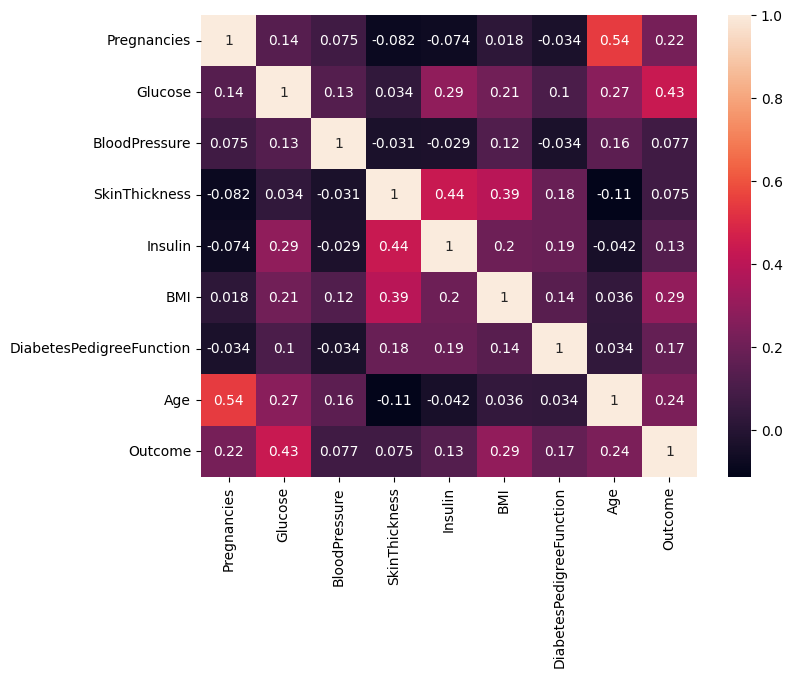

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **Logistic Regression**

In [ ]:
independent_variable = df.drop('Outcome',axis=1)
dependent_variable = df['Outcome']

In [ ]:
independent_variable.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,3,1,35,0,33.6,0.627,50
1,1,1,1,29,0,26.6,0.351,31
2,8,3,1,0,0,23.3,0.672,32
3,1,1,1,23,94,28.1,0.167,21
4,0,3,1,35,168,43.1,2.288,33


In [ ]:
dependent_variable.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
y = dependent_variable
X = independent_variable


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.3, random_state=0)

In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

Before OverSampling, the shape of train_X: (537, 8)
Before OverSampling, the shape of train_y: (537,) 



Here, we see that that there is a difference of **171 data points** between **X_train** and **y_train**.





Using **SMOTE** to minimize the data gap.

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_train_sm,y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

Before OverSampling, the shape of train_X: (686, 8)
Before OverSampling, the shape of train_y: (686,) 



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train_sm, y_train_sm)
y_pred = logistic.predict(X_test)
acc_1=accuracy_score(y_test, y_pred)
accuracy1=round(acc_1*100,2)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print(accuracy1)

Confusion Matrix : 
 [[120  37]
 [ 22  52]]
74.46


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print(classification_report(y_test,y_pred))
print('The accuracy score of logistic regression is {}%'.format(accuracy1))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       157
           1       0.58      0.70      0.64        74

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.76      0.74      0.75       231

The accuracy score of logistic regression is 74.46%


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sm,y_train_sm)
y_pred4 = decision_tree.predict(X_test)
acc_4 = accuracy_score(y_test, y_pred4)
score4 = round(acc_4*100,2)
print(classification_report(y_test,y_pred))

print('The accuracy score of Decision tree is {}%'.format(score4))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       157
           1       0.58      0.70      0.64        74

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.76      0.74      0.75       231

The accuracy score of Decision tree is 66.23%
